## Model Evaluation

In this section we will speak about model evaluation.

Indeed, a good, robust, unbiased model evaluation is key for good performances.

What is important is a good dataset split, and to choose the right evaluation metric.

## Reminder about ML project

On that typical timeline, when would you define your evaluation method:
- defining the problem
- collecting data
- cleaning/preparing data
- training and optimizing model
- model evaluation
- model deployment

The evaluation method, that commonly implies at least a **metric**, has to be defined at the **beginning of a project**.

# I. Data Split

## I.1. Training & Test Sets

It is crucial to separate the data into two sets:
- data for **training** a model: the **train set**
- data for **evaluating**, or testing your model: the **test set**

Why?

A student is expected to train on the courses and exercises, but to be evaluated on a completely new, somehow related, test.

If the student knows all the answers to the exercises, it does not necessarily mean he/she will be able to generalize well on the test.

This is the same for a model.

You need to test your model on **new data** to make sure it learned correcly.

<center>
<img src="https://drive.google.com/uc?export=view&id=1x4j8bjbFbkSUKKsRPcPAGeJs8JF1OI9g" width="300">
</center>

The usual convention, although not mandatory, is the following:
- training set: 80 % of the data
- test set : 20 % of the data

<center><img src="https://drive.google.com/uc?export=view&id=1I0Dn2d0RUM1BrOGG40VKwJHfKE-Lh6VE" width="450"></center>

> The idea is that you keep most of the data to train your model correctly, and evaluate it on a smaller, but statistically enough, dataset

In order to avoir any bias, it is recommended to shuffle the data before the split.

Meaning for example, over 100 samples in the original dataset:
- 80 random samples will be in the train set
- 20 remaining samples will be in the test set

This way we ensure there is no bias: like for example a sorted dataset.

To recap, we have:

-  a **Training set**: A set of samples used for **learning**. It **fits the parameters (or weights) of the model**.
   
    Usually noted `X_train` for the features and `y_train` for the associated labels.


- a **Test set**: A set of new, unseen samples used only to **evaluate** of the model.

    Usually noted `X_test` for the features and `y_test` for the associated targets.

Fortunately, this can be done automatically thanks to scikit-learn function `train_test_split`:

In [ ]:
# Sklearn provides a function to split your data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## I.2. Stratification

Now imagine having what we call an imbalanced dataset: most of the samples belong to the same class, like the following example:

![](images/empty_split.png)

If we let the randomness choose for us, we might end up with a split like the following (assuming here a 70%-30%):

![](images/bad_split_2.png)

This is wrong, how could we have a proper evaluation with only one class in test set?

Another risk (less likely), is the following:

![](images/bad_split_1.png)

The point is, we want to **keep the class balance** between our datasets.

This is exactly what **stratification** does: it ensures the class balance remains the same.

![](images/stratified_split.png)

This can be done easily thanks to scikit-learn, with the parameter `stratify` of the `train_test_split` method:

In [ ]:
# Sklearn provides a function to split your data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## I.3. Split and data preparation

In order to be completely bias free, the **data preparation should be done on the train set**.

If we don't, then some information from the test set might go through the training set.

For example, while rescaling the data, if you use all the dataset, you have some information about the test set.

> This is called **data leakage** and is a common error

# II. Evaluation for classification

## II.1. Accuracy

Let's consider again our customer churn classification model: 
- `0` for not churner
- `1` for churner

We evaluated our classification model by computing the **accuracy**: the number of correct predictions over the total number of predictions.

In other words, it's the **percentage of correct predictions** of the model, on the test set.

This is probably the most intuitive evaluation metric.

Though, is it always a good metric for evaluating a model?

## II.2. Confusion matrix, Precision and Recall

Let the results of our customer be the following on the test set:

| | Not Churner | Churner | 
|------|------|------|
| Predicted Not Churner | 49 | 5 |
| Predict Churner | 1 | 45 |

This table is called a **confusion matrix**.

We call:
* True Positive (TP): the predicted positive samples that are indeed positive - here 45
* True Negative (TN): the predicted negative samples that are indeed negative - here 49
* False Positive (FP): the predicted positive samples that are actually negative - here 1
* False Negative (FN): the predicted negative samples that are actually positive - here 5

### Accuracy

| | Not Churner | Churner | 
|------|------|------|
| Predicted Not Churner 👎 | 49 | 5 |
| Predict Churner 👍 | 1 | 45 |

Accuracy as we know it can be redefined as:
$$Accuracy = \frac{TP + TN}{TP + TN + FN + FP}$$

In our case, $Accuracy = \frac{49 + 45}{49 + 5 + 1 45} = 0.94$ 

Our model has an accuracy of 94%. For this kind of application, this would be quite acceptable.

Now if our problem is not anymore a customer churn, but a cancer detection.

| | Healthy | Cancerous | 
|------|------|------|
| Predicted Healthy 👎 | 49 | 5 |
| Predict Cancerous 👍 | 1 | 45 |

Can we afford to let those 5 False Negative die?

Is accuracy a good metric for such a problem?

### Precision & Recall

There exist two metrics really useful for such problems:


- **Precision**: How many selected items are relevant?

Here, how many cancerous classified as such are indeed cancerous?

It's 45/46 = 0.978: **97.8% of cancerous classified patients are indeed cancerous**.

- **Recall**: How many relevant items are selected?

Here, how many actually cancerous patients are classified as such? 

It's 45/50 = 90: **90% of cancerous patients are actually detected**.

The formulas are the following:

$$
Precision = \frac{TP}{TP + FP}
$$


$$
Recall = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1LM2d2k6lPt8g3skTW3MTOErXwORhndYB" width="500">
</p>

## II.3. F1-score

If we want to maximize or compute both metrics, there exist the F1-score. Which is the harmonic mean of Precision and Recall:

$$
{F1\_score = \frac{2 \times (Precision \times Recall)}{Precision + Recall}}
$$


Here, we would have a F1-score of:
$$
F1\_score = \frac{2 \times 0.978 * 0.9}{0.978 + 0.9} = 0.9375 = 93.75 \%
$$

> NB: We can define Precision, Recall and F1-score per class. Here we assumed it was for the positive class.

## II.4. ROC curve

Most of the time, a classifier returns a value between 0 and 1 (that usually considered as a probability), and we consider the highest probability as the predicted class.

> In scikit-learn instead of predicting the class label with `model.predict(X)`,
one can do `model.predict_proba(X)` to retrieve probabilities

For each value of the threshold, one can compute the **False Positive Rate (FPR)** and the **True Positive Rate (TPR)**.

Then we can plot the curve ROC with the TPR as a function of the FPR:

![](images/roc_curves.png)

> Nice visualization of the ROC curve and impact of data distribution/threshold on it: http://www.navan.name/roc/

To summarize about ROC curves:
- A perfect model's ROC curve will stick to the roof of the plot
- A random model's ROC curve will be a y=x curve
- The better the model, the higher the curve

Can we get a metric out of this?

The **ROC Area Under Curve** (ROC AUC) can be seen as a metric:
- ROC AUC = 1 for a perfect classifier
- ROC AUC = 0.5 for a random classifier

## II.5. Implementation

All those metrics are implemented and available in scikit-learn, in `sklearn.metrics`: see all available [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

To use the metrics we spoke about, the code signatures are the following:
- `sklearn.metrics.accuracy_score`
- `sklearn.metrics.confusion_matrix`
- `sklearn.metrics.recall_score`
- `sklearn.metrics.precision_score`
- `sklearn.metrics.f1_score`
- `sklearn.metrics.roc_auc_score`

# III. Implementation example

Let's see a full implementation example on the *breast cancer dataset*.

First, let's load and split the data.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Load the data
X, y = load_breast_cancer(return_X_y=True)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

Now the data preparation with rescaling:

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now let's fit a model on the train dataset and predict values on the test dataset:

In [3]:
from sklearn.linear_model import LogisticRegression
# Fit on train
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Predict on test dataset
y_pred = lr.predict(X_test)

Finally let's evaluate our model.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
F1-score: 0.9863013698630138


### [Optional] ROC metric

If one wants to plot the ROC curve or compute the ROC AUC, here is the code:

ROC AUC score: 0.9957010582010581


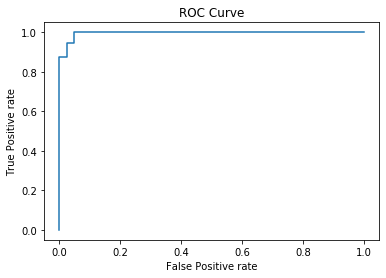

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Predict the proba
y_pred_proba = lr.predict_proba(X_test)

# Compute ROC AUC
print('ROC AUC score:', roc_auc_score(y_test, y_pred_proba[:,1]))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

# IV. Evaluation for regression

Regression works just like logistic regression.

We have a set of features X, labels y and a set of parameters $\theta$ such that:
$$
\hat{y} = h_\theta(x) = \sum \theta_j X_j + b
$$

Where $\hat{y}$ is the prediction of the label y.

> In a regression, the label y is a quantitative data.

The training method is the same as a logistic regression: gradient descent.

But the loss is different, this is usually the Mean Squared Error:
$$
\mathcal{L}(\theta) = \frac{1}{2m} \sum_i^m (y^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{2m} \sum_i^m (y^{(i)} - h_\theta(x^{(i)}))^2
$$

Here is an example of visualization of the evolution of a linear regression with gradient descent:

![](https://drive.google.com/uc?export=view&id=1_l5TDRJMBhHY-_GNehBD4d27aElKQJq1)


### Residual Sum of Squares 

We trained the Regression model by minimizing the distance between the model predictions and the data points

<img src="https://drive.google.com/uc?export=view&id=1UmfQle9OImxlTgu3AEUsk9Yvo8RYaVsR" width="100%">


If we sum all the squares of distances (in order to sum only positive values), we obtain the **Residual Sum of Squares**:

$$
RSS=\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))^{2}
$$

> In practice, this metric is not very commonly used

###  Mean Squared Error

In order to have a mean error, we can:

- Divide the RSS by the number of points (i.e. averaging). This gives us the **Mean Squared Error** (MSE):

$$
MSE=\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))^{2}
$$

> This metric is very commonly used: a MSE of 0 means a perfect regressor

### Root Mean Squared Error

- For more interpretability, one can compute the square of the MSE. Thus the metric is directly related to an interpretable value. This is called the **Root Mean Squared Error** (RMSE):

$$
RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))^{2}}
$$


> For example, if your home price regression model predict a house value of 1200k€ while having a RMSE of 20k€, it means you can be pretty confident in your estimation.

### R-squared

Finally, a very commonly used metric in regression: $R^2$


$$
R^2 = 1 - \frac{\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))^{2} }{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^{2}}
$$

Where $\hat{y}$ is the mean value of all the $y^{(i)}$.

$R^2$ gives an indication of **the correlation between the true and the predicted values**:
- if $R^2 \simeq 1$: the predictions are highly correlated to the real data
- if $R^2 \simeq 0$: there is no correlation between the predictions and the real data
- if $R^2 \simeq -1$: there is a high, inverse correlation between the predictions and the real data

> N.B.: Yes, the R2 score can be negative!

---

> 🔦 **Hint**: For understanding the trade-off of the threshold chosen, consider an airport security. Since passengers can be potential threats to safety, scanners may be set to trigger alarms on low-risk items like belt buckles and keys (**low specificity**) in order to increase the probability of identifying dangerous objects and minimize the risk of missing objects that do pose a threat (**high sensitivity**). 


As an example, let's build a ROC curve. We continue with our airport security example. Suppose our classifier returned the following scores ("+" represents a true threat, while a high score, close to 1, means a confident prediction that the observation is a threat) for 6 observations :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1byt8YC6h9klPF2s0lUYZ4rDyo3gJ05A1" width="400">
</p>

Then we can compute the TPR (=TP/P) and FPR (=FP/P) for every threshold range: 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1hJxvUQKKS5RZzv6FvbKKH7Ua-nsawyDa" width="500">
</p>

Which gives us the following ROC curve:
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1dXCxWe5jiEHz_bsf5wXziK8mqJjxEzXX" width="300">
</p>